In [8]:
# Install the required libraries
!pip install pydub librosa soundfile matplotlib

In [9]:
from pydub import AudioSegment
import librosa
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt

In [88]:
# Load the audio file using Librosa
audio_path = "C:/Users/hp/Documents/Python/Audio Slicing Project/audio data/My_audio_1.opus"
audio, sr = librosa.load(audio_path, sr=None)

# Print basic details about the audio
print(f"len of audio: {len(audio)}")
print(f"Sampling Rate: {sr} Hz")
print(f"Duration: {len(audio) / sr} seconds")


len of audio: 157725
Sampling Rate: 16000 Hz
Duration: 9.8578125 seconds


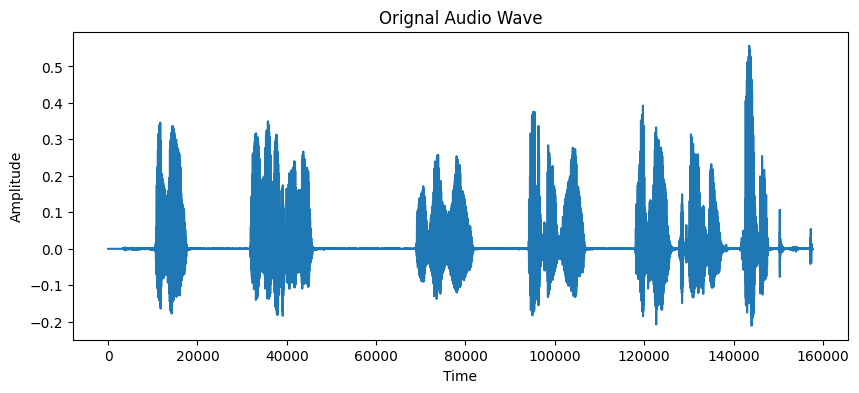

In [50]:
# ploting 
plt.figure(figsize=(10,4))
plt.plot(audio)
plt.title('Orignal Audio Wave')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [51]:
# Compute short-time energy
frame_length = int(sr * 0.02)  # 20ms frame
hop_length = int(sr * 0.01)   # 10ms overlap
energy = np.array([
    sum(abs(audio[i:i+frame_length]**2))
    for i in range(0, len(audio), hop_length)
])

# Set silence threshold (adjust based on data)
threshold = 0.01 * max(energy)
silence_frames = energy < threshold


In [66]:
import librosa.effects as effects

# Use librosa's built-in function to remove silence
non_silent_intervals = librosa.effects.split(audio, top_db=12)  # Adjust `top_db` as needed

# Concatenate non-silent parts
output_audio = np.concatenate([audio[start:end] for start, end in non_silent_intervals])


In [83]:
import soundfile as sf
from IPython.display import Audio

# Save the processed audio
sf.write("processed_audio.wav", output_audio, sr)
Audio('processed_audio.wav')

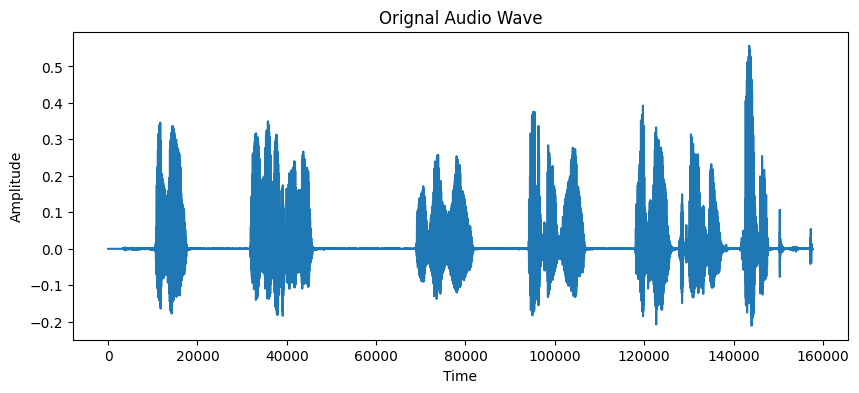

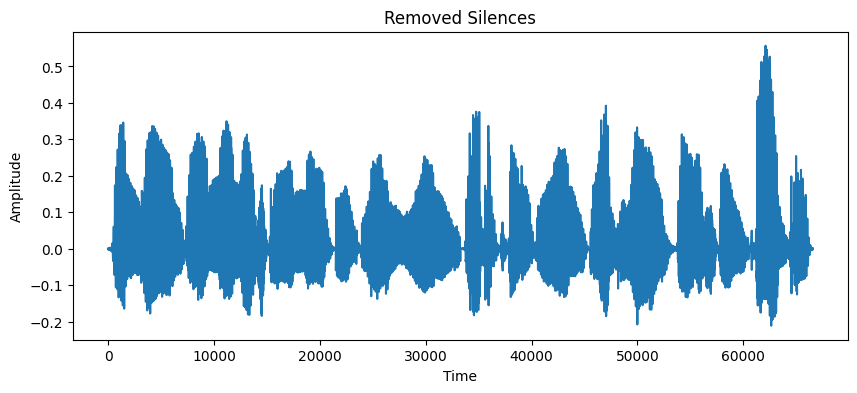

In [73]:
# Raw audio plot 
plt.figure(figsize=(10,4))
plt.plot(audio)
plt.title('Orignal Audio Wave')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

# Processed audio plot 
plt.figure(figsize= (10,4))
plt.plot(output_audio)
plt.title('Removed Silences')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()